In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

from mlxtend.plotting import plot_decision_regions 
import missingno as msno

from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix

from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve_score
from sklearn.model_selection import GridSearchCV

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


ImportError: cannot import name 'roc_curve_score' from 'sklearn.metrics' (C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [4]:
!pip install mlxtend

In [2]:
diabetes_df=pd.read_csv('C:\\Users\\Asus\\Downloads\\diabetes.csv')

In [3]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis(EDA)

In [4]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diabetes_df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [9]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
diabetes_df_copy=diabetes_df.copy(deep=True)
diabetes_df_copy [['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] =diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64



# Data Visualization

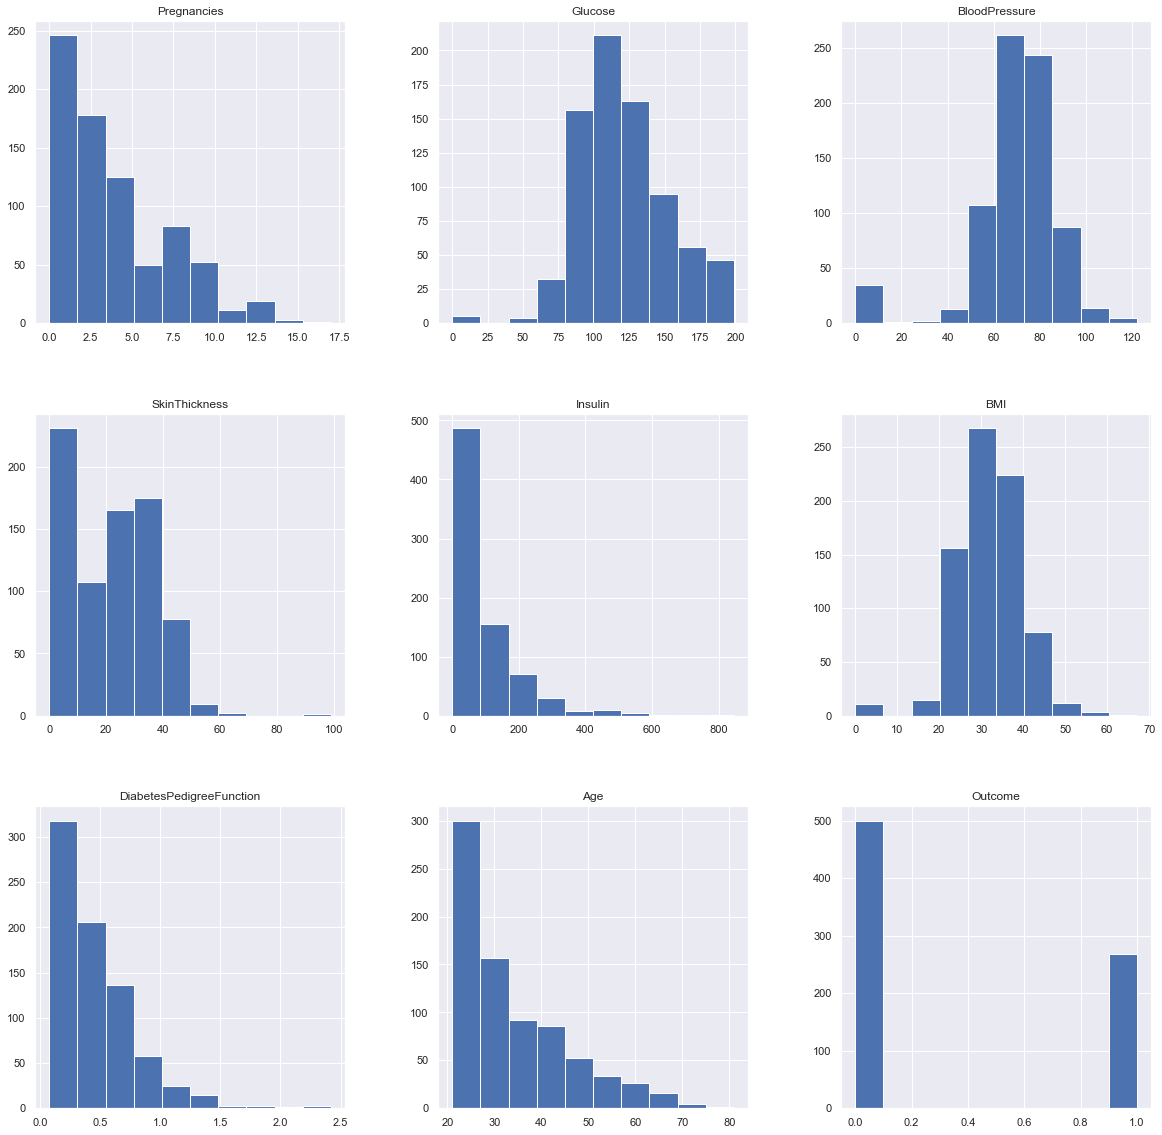

In [11]:
v=diabetes_df.hist(figsize=(20,20))

In [12]:
diabetes_df_copy['Glucose']=diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean())
diabetes_df_copy['BloodPressure']=diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean())
diabetes_df_copy['SkinThickness']=diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median())
diabetes_df_copy['Insulin']=diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median())
diabetes_df_copy['BMI']=diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median())

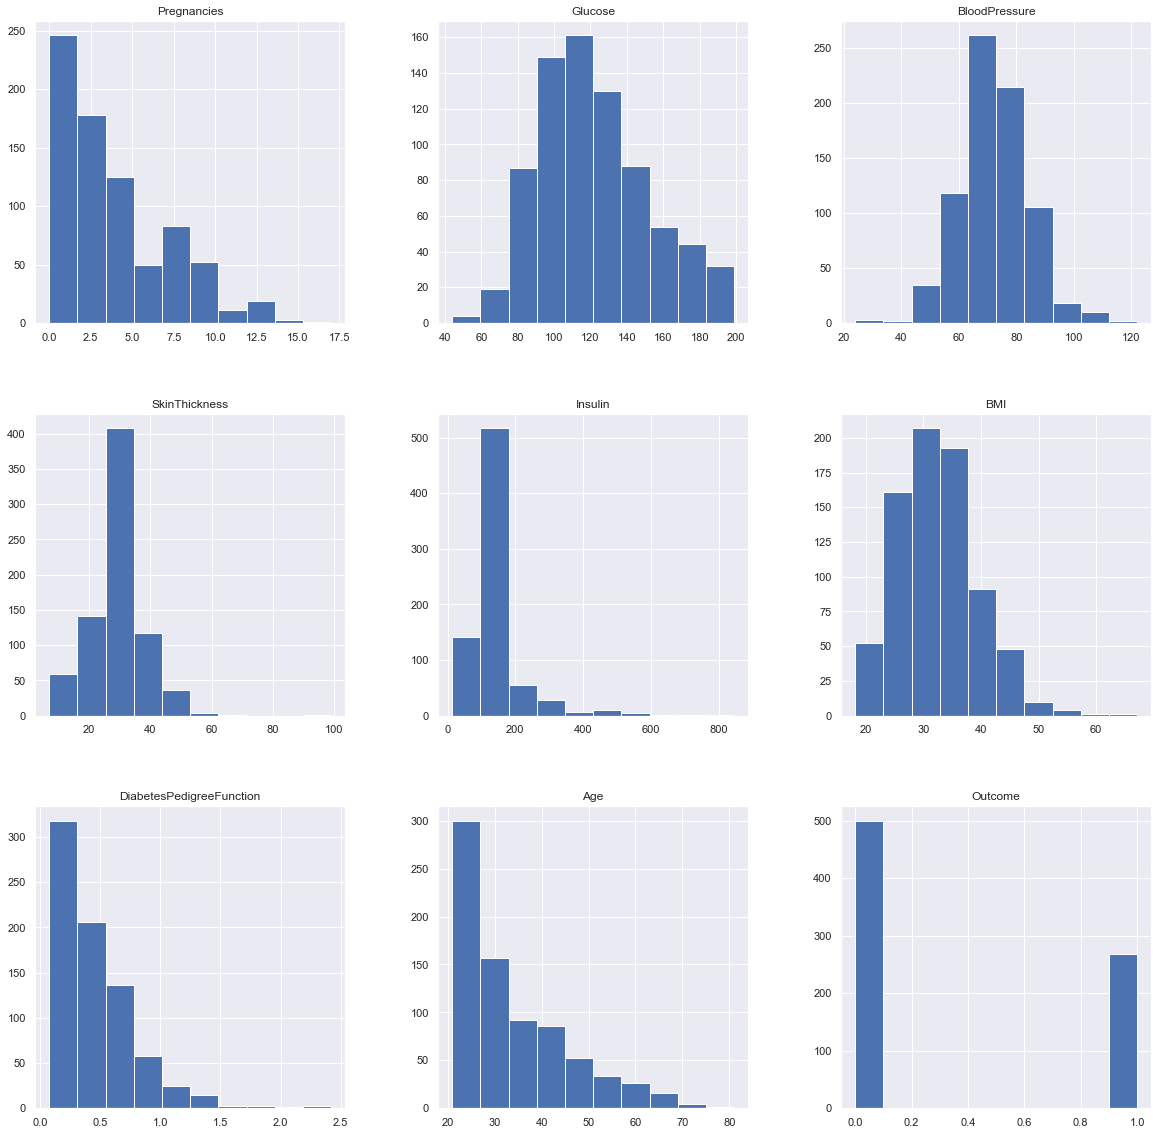

In [13]:
v=diabetes_df_copy.hist(figsize=(20,20))

In [14]:
!pip install missingno

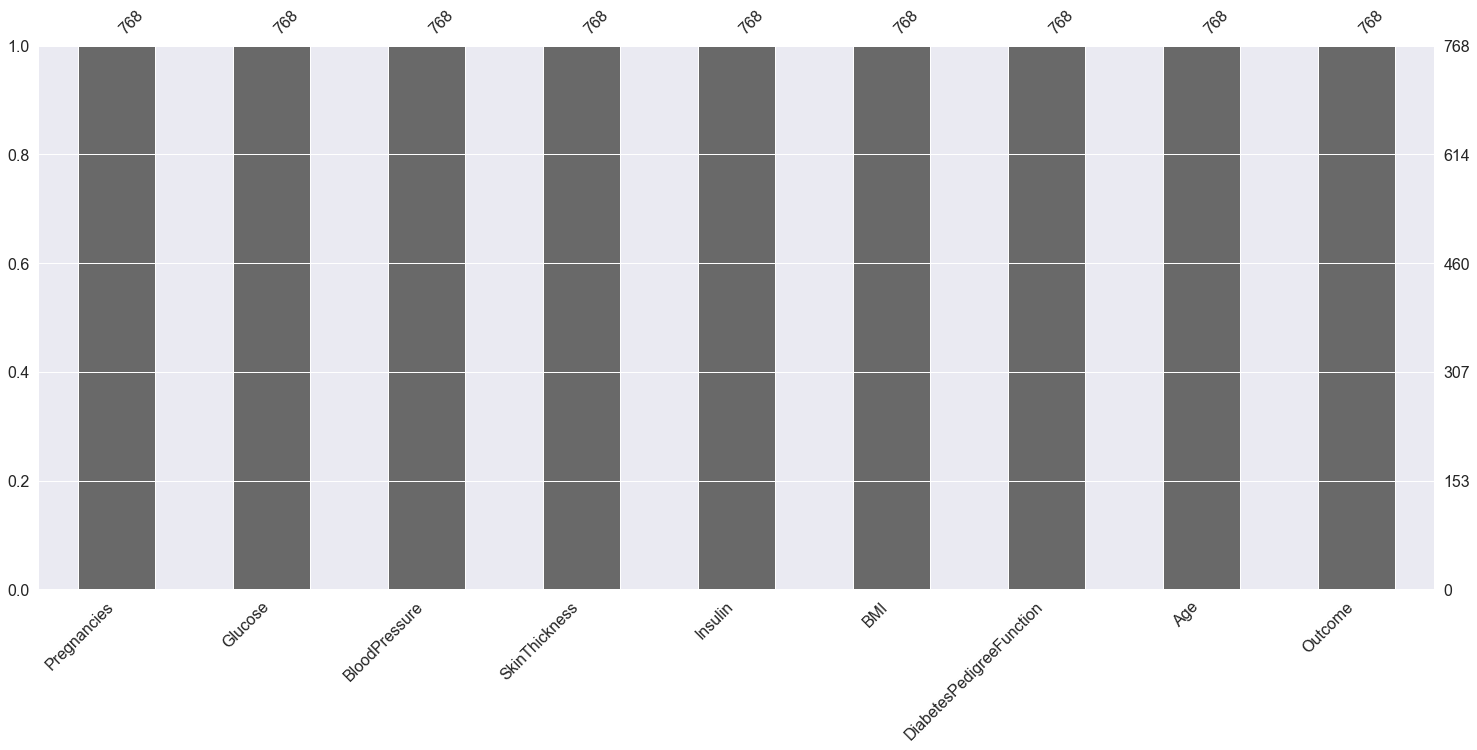

In [33]:
import missingno as msno
v=msno.bar(diabetes_df)

Outcome
0    500
1    268
Name: count, dtype: int64


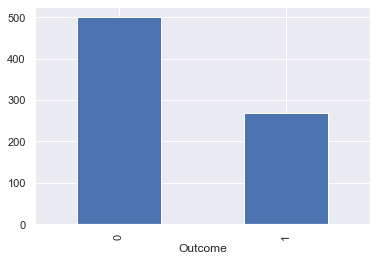

In [15]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}

colors = diabetes_df["Outcome"].map(lambda x: color_wheel.get(x + 1))

print(diabetes_df.Outcome.value_counts())

v=diabetes_df.Outcome.value_counts().plot(kind="bar")

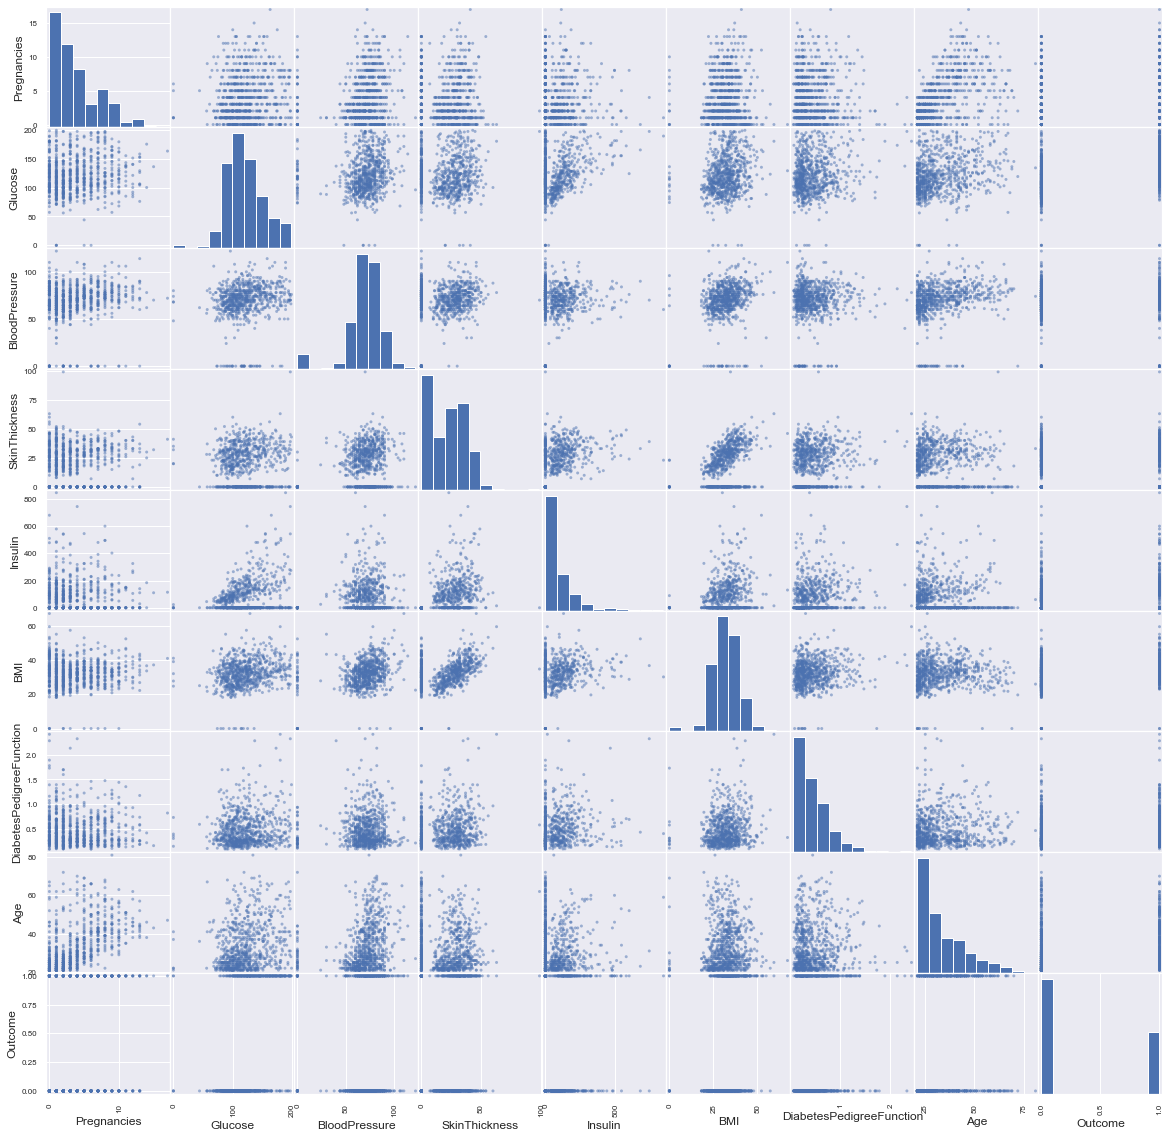

In [16]:
from pandas.plotting import scatter_matrix
v=scatter_matrix(diabetes_df,figsize=(20,20))

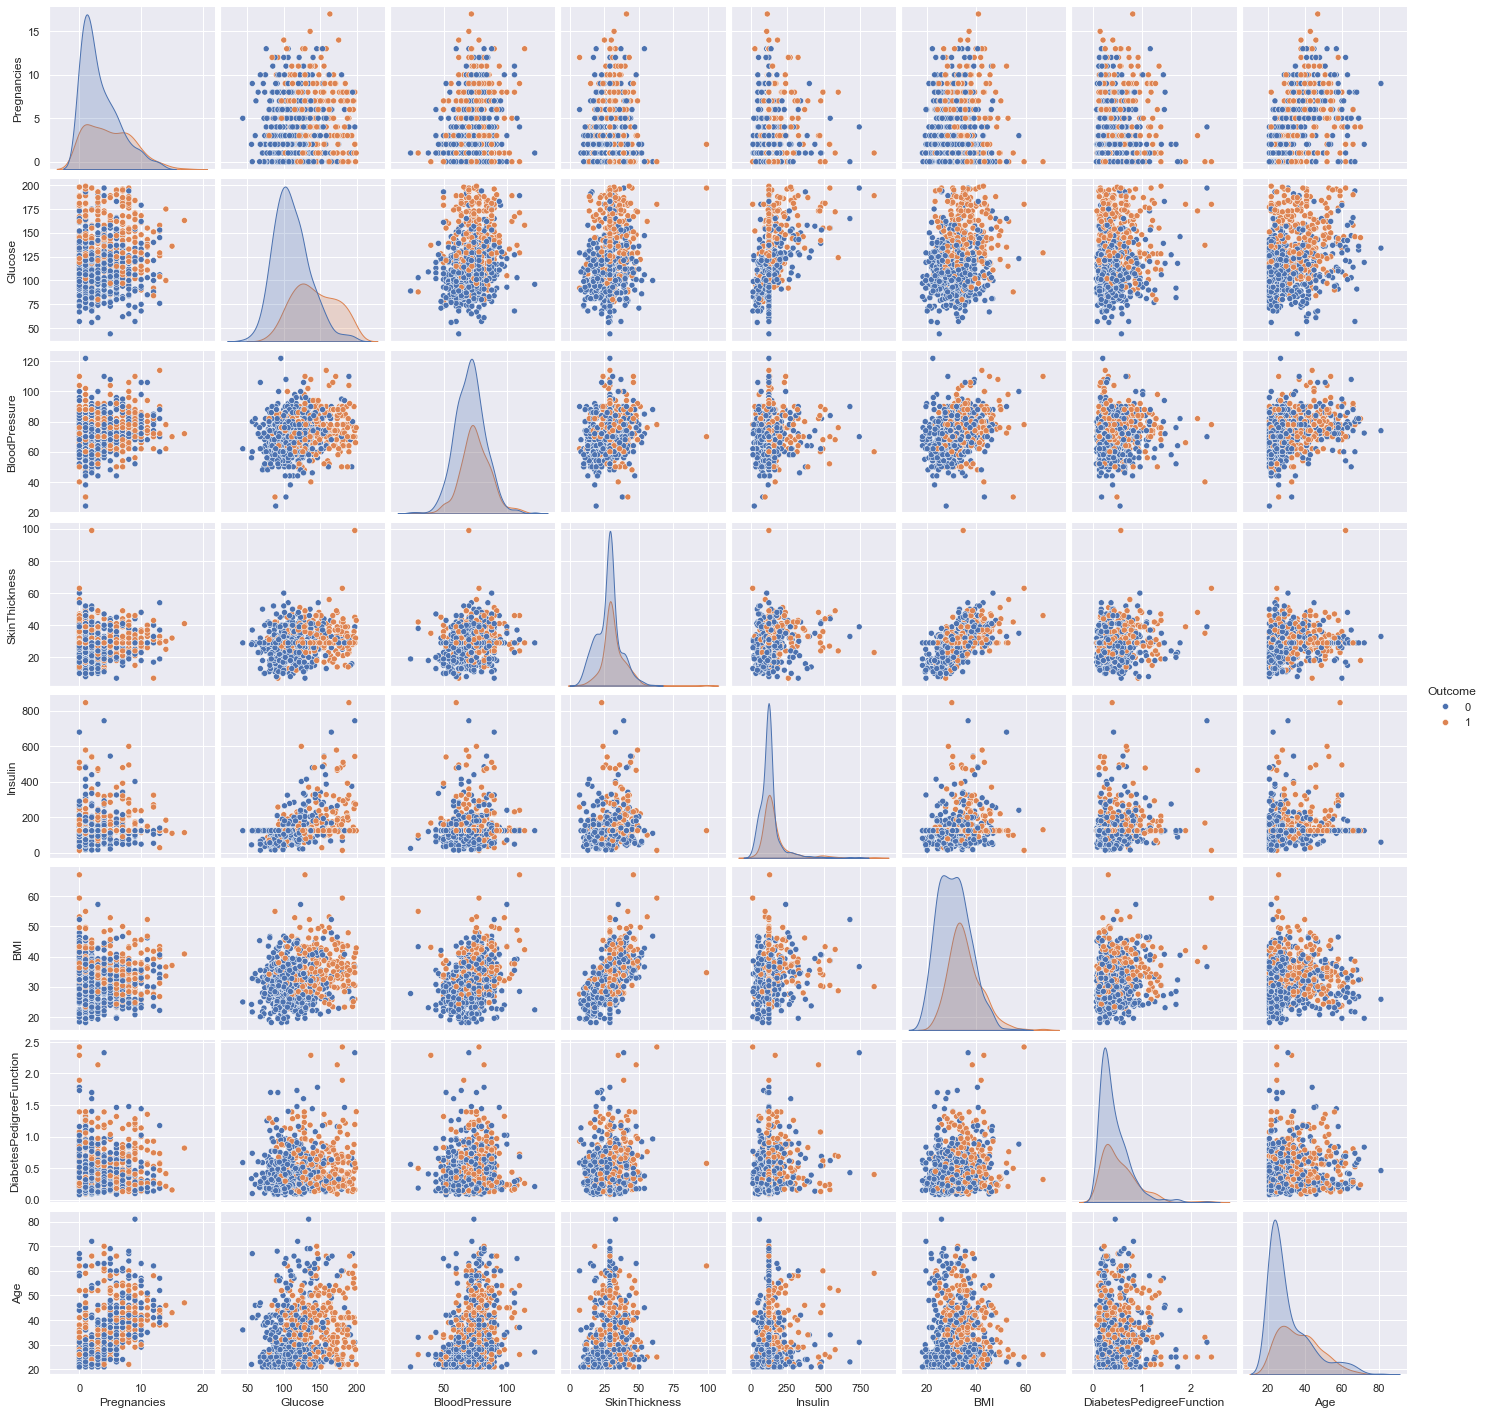

In [17]:
v=sns.pairplot(diabetes_df_copy,hue='Outcome')

# Correlation between all the features

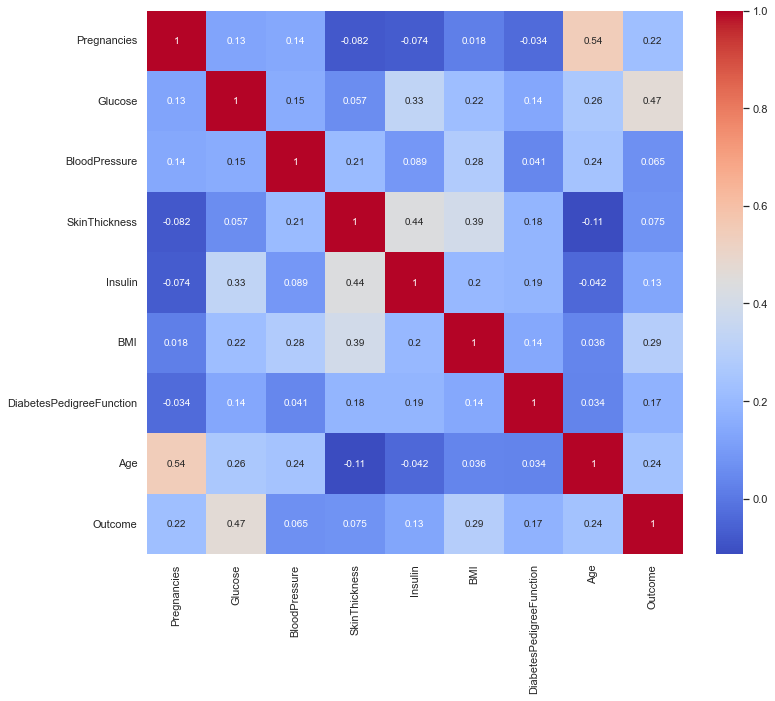

In [18]:
plt.figure(figsize=(12,10))
v=sns.heatmap(diabetes_df.corr(),annot=True,cmap='coolwarm')

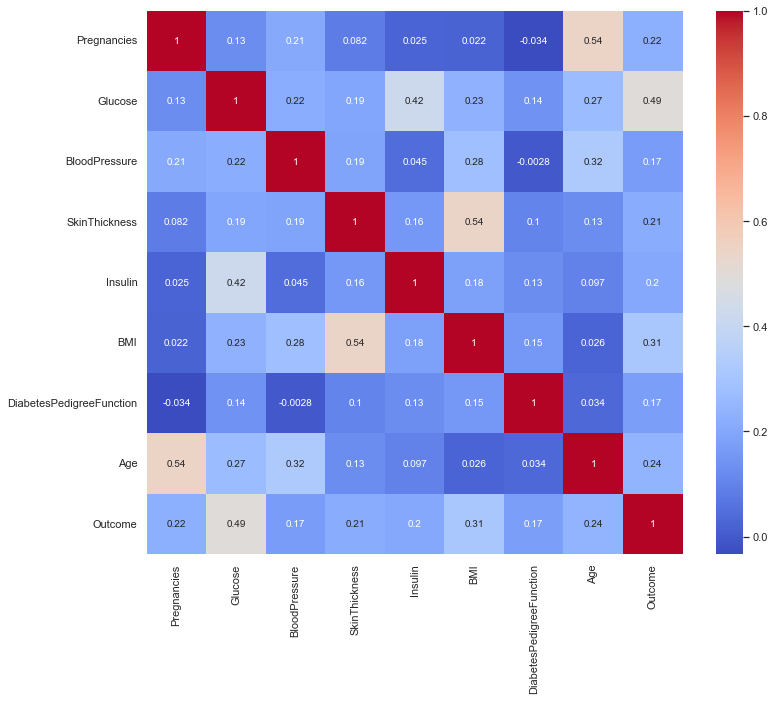

In [19]:
plt.figure(figsize=(12,10))
v=sns.heatmap(diabetes_df_copy.corr(),annot=True,cmap='coolwarm')

# Scaling the data

In [20]:
diabetes_df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [21]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X=pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["Outcome"],axis=1),),columns=['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction','Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [22]:
Y=diabetes_df_copy.Outcome

In [23]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Splitting the data into train and test

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3,stratify=Y,random_state=42)

# Model Building


K-Nearest-Neighbor(KNN)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
test_scores=[]
train_scores=[]

for i in range(1,15):
    
    knn=KNeighborsClassifier(i)
    knn.fit(X_train,Y_train)
    
    train_scores.append(knn.score(X_train,Y_train))
    test_scores.append(knn.score(X_test,Y_test))

In [26]:
train_scores

[1.0,
 0.84375,
 0.8671875,
 0.8359375,
 0.828125,
 0.8046875,
 0.814453125,
 0.802734375,
 0.798828125,
 0.802734375,
 0.798828125,
 0.79296875,
 0.794921875,
 0.796875]

In [27]:
test_scores

[0.73046875,
 0.73046875,
 0.74609375,
 0.7421875,
 0.7421875,
 0.72265625,
 0.74609375,
 0.74609375,
 0.74609375,
 0.73046875,
 0.765625,
 0.734375,
 0.75,
 0.734375]

In [28]:
max_train_score=max(train_scores)
train_scores_ind=[i for i,v in enumerate(train_scores) if v==max_train_score]
print('Max train score {} % and k={}'.format(max_train_score*100,list(map(lambda x:x+1,train_scores_ind))))

Max train score 100.0 % and k=[1]


In [29]:
max_test_score=max(test_scores)
test_scores_ind=[i for i,v in enumerate(test_scores) if v==max_test_score]
print('Max test score {} % and k={}'.format(max_test_score*100,list(map(lambda x:x+1,test_scores_ind))))

Max test score 76.5625 % and k=[11]


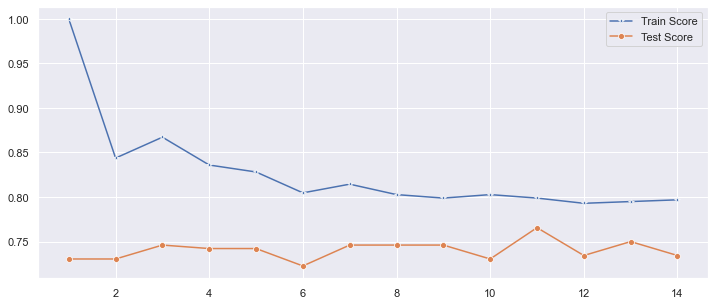

In [30]:
x_values=range(1,15)
plt.figure(figsize=(12,5))
p=sns.lineplot(x=x_values,y=train_scores,marker='*',label='Train Score')
p=sns.lineplot(x=x_values,y=test_scores,marker='o',label='Test Score')


In [31]:
knn=KNeighborsClassifier(11)
knn.fit(X_train,Y_train)
knn.score(X_test,Y_test)

0.765625

In [32]:
#Plot the Decision Boundary
from mlxtend.plotting import plot_decision_regions 
value=20000
width=20000

plot_decision_regions (X.values, y.values, clf=knn, legend=2, 
                       filler_feature_values={2: value, 3: value, 4: value, 5: value},
                       filler_feature_ranges={2: width, 3: width, 4: width, 5: width},
                       X_highlight=X_test.values)

plt.title('KNN with Diabetes Data')
plt.show()

NameError: name 'y' is not defined

# Confusion Matrix

Text(0.5, 12.5, 'Predicted label')

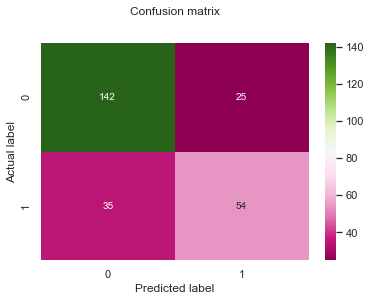

In [33]:
from sklearn import metrics
Y_pred = knn.predict(X_test)

cnf_matrix=metrics.confusion_matrix(Y_test, Y_pred) 
p=sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="PiYG", fmt='g')

plt.title('Confusion matrix',y=1.1)

plt.ylabel('Actual label')

plt.xlabel('Predicted label')

In [34]:
#Classification Reports
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



# ROC-AUC Curve

In [35]:
from sklearn.metrics import roc_curve
Y_pred_proba = knn.predict_proba(X_test)[:,1] 
fpr, tpr, thresholds = roc_curve(Y_test,Y_pred_proba)

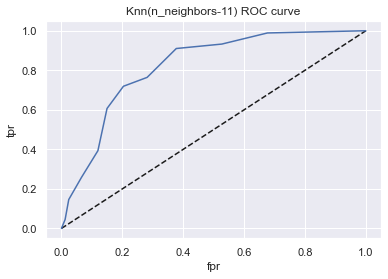

In [36]:
plt.plot([0,1], [0,1], 'k--')

plt.plot(fpr, tpr, label='Knn')

plt.xlabel('fpr')

plt.ylabel('tpr')

plt.title('Knn(n_neighbors-11) ROC curve')

plt.show()

In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,Y_pred_proba)

0.8193500639171096

# Implementing GridSearchCV

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors': np.arange(1,50)}

knn = KNeighborsClassifier()

knn_cv= GridSearchCV(knn, param_grid,cv=5)

knn_cv.fit(X,Y)

print("Best Score:" + str(knn_cv.best_score_))

print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7721840251252015
Best Parameters: {'n_neighbors': 25}


In [43]:
import pickle

In [ ]:
pickle.dump(model,open())